# Simple Word Frequency List and Word Cloud

### by Eko Saputro

This project is just an example of how to make a simple word frequency list and word cloud from a text. I use an article from Harvard Business Review about "The Sexiest Job of the 21st Century" as text data. You can see the original article [here](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century) and the text data [here](https://github.com/ekosaputro09/Data-Science-Project/blob/master/Simple%20Word%20Frequency%20List%20and%20Word%20Cloud/HBR_Sexiest_Job_21stCentury.txt). We gonna use Counter package to make frequency list and WordCloud package to make a word cloud.

First, we have to import libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

And read the text data

In [2]:
text = open('HBR_Sexiest_Job_21stCentury.txt').read()

In [3]:
type(text)

str

## Data Preprocessing

Before we are going to make frequency list or word cloud, we have to clean our data. We have to convert all the letters to lowercase, remove number and punctuation, and remove the unnecessary whitespace. Then we split our text data by words.

In [4]:
def textPreprocessing(data):
    
    lower_data = data.lower()
    
    words = re.sub(r'[-/,"?.!$%^&*()]','',lower_data)
    words = re.sub(r'[0-9]', '', words)
    words = words.replace('  ', ' ')
    words = words.replace('\n', ' ')
    
    words_split = words.split(" ")
    
    return words_split

In [5]:
words = textPreprocessing(text)

The function returns a list of words from our text data

In [6]:
type(words)

list

Next, we want to remove stop words or unnecessary words like when, this, that, can, etc. We have already imported the built-in stop words from the wordcloud package (STOPWORDS).

Maybe we want to add other words to be removed that not in the STOPWORDS list, we can define our custom stop words by our selves and then join it with the STOPWORDS list using union method. And Finally, we remove that stop words from our text data.

In [7]:
custom_stop = ['also', 'already', 'even', 'less', 'may', 'might', 'often', 'yet', 'want', 'whose', 'will', 'us']

def removeStopwords(data, stopwords, custom_stop):
    stop = stopwords.union(custom_stop)
    
    clean_words = [x for x in data if x not in stop]
    
    return clean_words

In [8]:
clean_words = removeStopwords(data=words, stopwords=STOPWORDS, custom_stop=custom_stop)

We have cleaned our data, let's make a frequency list and word cloud.

## Word Frequency List

Here we use Counter function to calculate the sum of each word and return it as a dictionary with the words as a key and its frequency as a value.

In [9]:
cnt = Counter()

In [10]:
for word in clean_words:
    cnt[word] += 1

In [11]:
for key, value in cnt.most_common(100):
        print(key,value)

data 107
scientists 46
big 19
people 18
one 13
business 11
make 11
companies 10
science 10
skills 10
goldman 9
linkedin 9
new 9
need 9
scientist 9
talent 9
team 8
analytics 8
firms 8
good 7
s 7
work 6
given 6
services 6
site 5
executives 5
know 5
challenges 5
working 5
important 5
programs 5
search 5
clear 5
products 5
many 5
program 5
users 4
rate 4
social 4
leave 4
early 4
analysis 4
value 4
linkedin's 4
time 4
now 4
example 4
days 4
managers 4
training 4
set 4
google 4
think 4
problem 4
backgrounds 4
computer 4
math 4
colleagues 3
connections 3
expected 3
something 3
networks 3
developing 3
ideas 3
traditional 3
form 3
ads 3
best 3
got 3
becoming 3
things 3
discoveries 3
years 3
facebook 3
startups 3
information 3
several 3
analytical 3
hadoop 3
skill 3
use 3
demand 3
firm 3
find 3
hiring 3
little 3
role 3
add 3
large 3
keep 3
communicate 3
creative 3
language 3
say 3
among 3
field 3
roumeliotis 3
today 3
structured 3
candidates 3


Since the article is talking about big data and data science, so the words 'data', 'scientists' and 'big' are the most frequent words from it.

## Word Cloud

In order to make a word cloud, we have to generate it from string text data. Since we have split our data into a list, we have to rejoin them into a string again.

In [12]:
join_words = ' '.join(clean_words)

In [13]:
type(join_words)

str

Next, we generate a word cloud using WordCloud function and display it using matplotlib.

In [14]:
wordcloud = WordCloud(scale=2).generate(join_words)

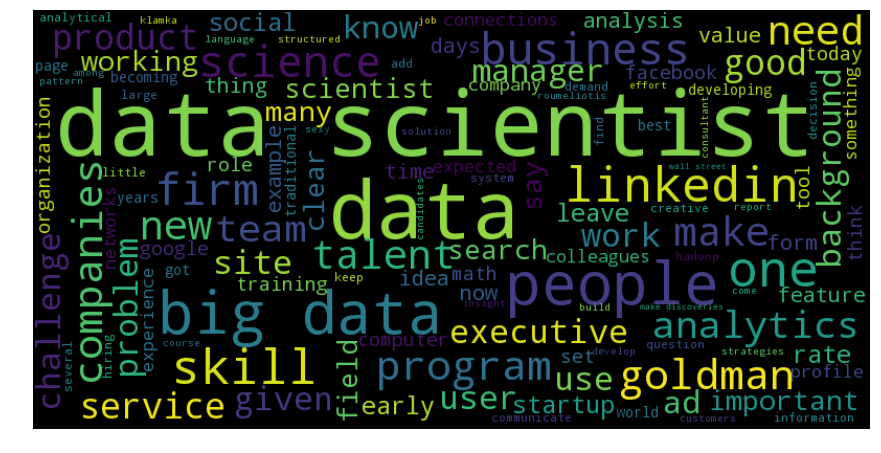

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Finally, we can save our word cloud image.

In [16]:
wordcloud.to_file('mySimpleWordCloud.png')